In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Alternate code to use files saved in Google Drive
# downloaded = drive.CreateFile({'id':'11GXgWJQRtz06MDGbDnJPl4tFMPou90UN'}) # replace the id with id of file you want to access
# downloaded.GetContentFile('train.csv') 
# downloaded = drive.CreateFile({'id':'19dR7pMYQeHd8815S27U6mTEWLgo7KJfd'}) # replace the id with id of file you want to access
# downloaded.GetContentFile('test.csv') 
# train_path = '/content/First/test.csv'
# test_path = '/content/First/test.csv'

### **Part 1:Filtering and making the dataset appropriate for Testing and Training**

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
X_train_0 = pd.get_dummies(df_train[['Parch','Pclass','Survived','Sex','Age','Embarked']])#The original data had non-numeric features. To deal with it we used this method.
X_train_0

,Parch,Pclass,Survived,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,0,1,0,0,1
1,0,1,1,38.0,1,0,1,0,0
2,0,3,1,26.0,1,0,0,0,1
3,0,1,1,35.0,1,0,0,0,1
4,0,3,0,35.0,0,1,0,0,1
5,0,3,0,NaN,0,1,0,1,0
6,0,1,0,54.0,0,1,0,0,1
7,1,3,0,2.0,0,1,0,0,1
8,2,3,1,27.0,1,0,0,0,1
9,0,2,1,14.0,1,0,1,0,0


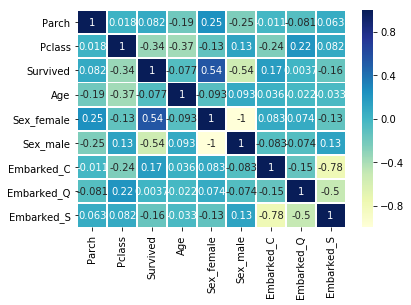

In [4]:
corr=X_train_0.corr()
import seaborn as sns
sns.heatmap(corr, linewidths = 0.8, annot=True, center=0, cmap="YlGnBu")

In [5]:
#Taking care of Nan values and making Testing and Training Set
X_train_1 = X_train_0.drop(columns=['Survived'])
X_train_1.fillna(X_train_1.mean(), inplace=True)#Filled the Nan values with mean of respective Classes
y_train_1=df_train['Survived']
print("Training set Nan value number:\n",X_train_1.isna().any())#Checking that there are no Nan values left
X_test = pd.get_dummies(df_test[['Parch','Pclass','Sex','Age','Embarked']])
X_test.fillna(X_train_1.mean(), inplace=True)#Filled the Nan values with mean of respective Classes
print("Testing set Nan value number:\n",X_test.isna().any())#Checking that there are no Nan values left

Training set Nan value number:
 Parch         False
Pclass        False
Age           False
Sex_female    False
Sex_male      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool
Testing set Nan value number:
 Parch         False
Pclass        False
Age           False
Sex_female    False
Sex_male      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool


In [6]:
#Spliting data in Training and Validating sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=10)

### **Part 2:Training the dataset using different classifiers and models**

Accuracy using LogisticRegression: 0.4396444363334933


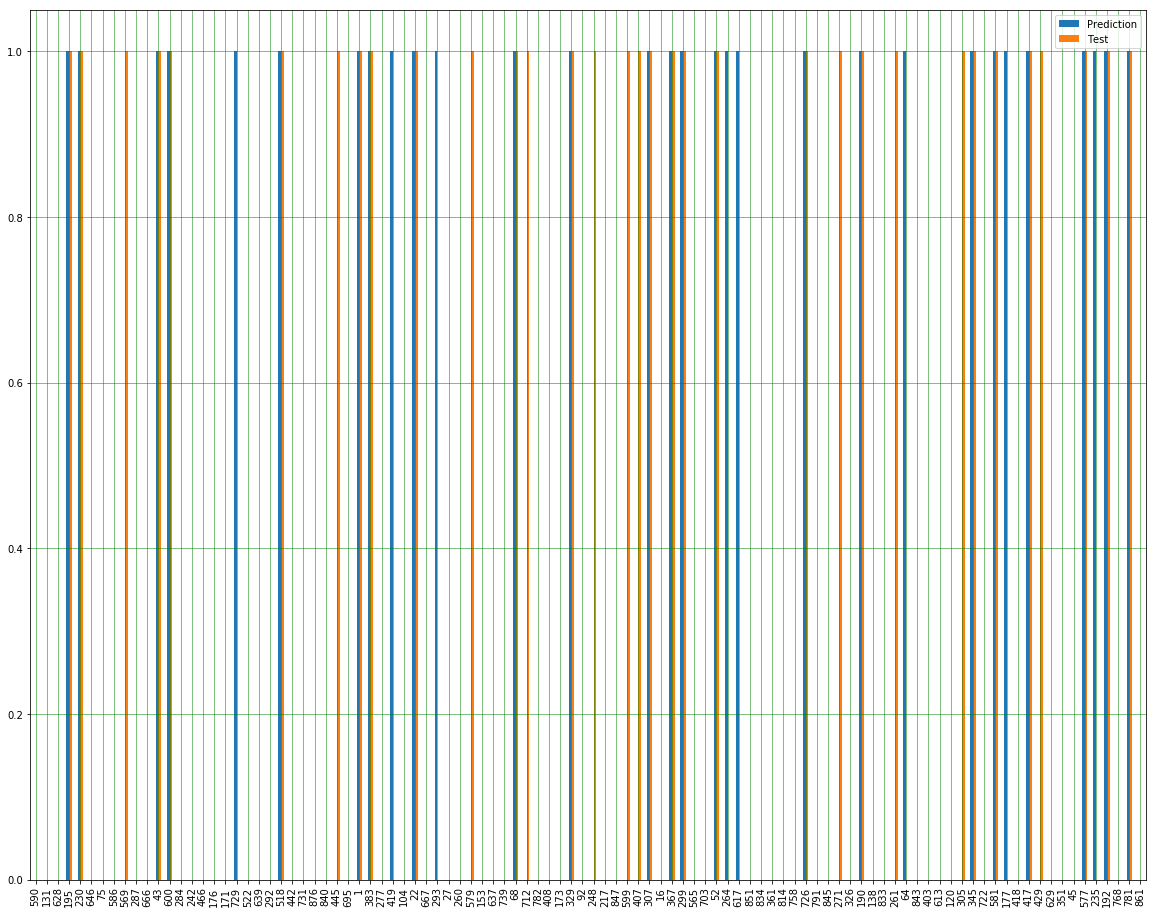

In [7]:
#Using Linear Regression Classifier to predict the survival rate
from sklearn.linear_model import LinearRegression
model_lreg = LinearRegression()
model_lreg.fit(X1_train,y1_train)#Fitting the classifier
y_predict_0 = model_lreg.predict(X1_test)
mean_0 = (min(y_predict_0)+max(y_predict_0))/2
#Since we used a Regressor therefore it predicted values not in 0(s) or 1(s) but in decimal numbers which can have any float 
#type value, so based on those values we need to classify them as 0 and 1 using mean of the extremes of the predicted data
for i in range(y_predict_0.shape[0]):
    if y_predict_0[i]>=mean_0:
        y_predict_0[i]=1
    else:
        y_predict_0[i]=0
print("Accuracy using LogisticRegression:",model_lreg.score(X1_test,y1_test))
#Visualising the predicted results and cheching their accuracy against actual values from validation set
y = pd.DataFrame({'Prediction': y_predict_0 , 'Test': y1_test})
y1=y.head(100)
y1.plot(kind='bar',figsize=(20,16))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [8]:
#Predicting data for the actual test set
y_predict_lreg = model_lreg.predict(X_test)
mean_lreg = (min(y_predict_lreg)+max(y_predict_lreg))/2
int_y_predict_lreg=[x for x in range(y_predict_lreg.shape[0])]#Since y_predict has a float type value and for submission on kaggle we need an int value so we define an array for the same with the required type and have 0s and 1s as inputs in this
#Since we used a Regressor therefore it predicted values not in 0(s) or 1(s) but in decimal numbers which can have any float 
#type value, so based on those values we need to classify them as 0 and 1 using mean of the extremes of the predicted data
for i in range(y_predict_lreg.shape[0]):
    if y_predict_lreg[i]>=mean_lreg:
        int_y_predict_lreg[i]=1
    else:
        int_y_predict_lreg[i]=0
Prediction1 = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': int_y_predict_lreg})
Prediction1.to_csv('Titanic_survival_lreg.csv', index=False)#Saving the obtained predicted results

In [9]:
#Using Random Forest Classifier to predict the survival rate
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_rf.fit(X1_train,y1_train)#Fitting the classifier
y_predict_rf = model_rf.predict(X_test)
Prediction2 = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_predict_rf})
Prediction2.to_csv('Titanic_survival_rf.csv', index=False)#Saving the obtained predicted results

In [10]:
#Using Logistic Regression Classifier to predict the survival rate
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression(random_state=0)
model_logr.fit(X1_train,y1_train)#Fitting the classifier
y_predict_logr = model_logr.predict(X_test)
mean_logr = (min(y_predict_logr)+max(y_predict_logr))/2
#Since we used a Regressor therefore it predicted values not in 0(s) or 1(s) but in decimal numbers which can have any float 
#type value, so based on those values we need to classify them as 0 and 1 using mean of the extremes of the predicted data
for i in range(y_predict_logr.shape[0]):
    if y_predict_logr[i]>=mean_logr:
        y_predict_logr[i]=1
    else:
        y_predict_logr[i]=0
Prediction3 = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_predict_logr})
Prediction3.to_csv('Titanic_survival_logr.csv', index=False)#Saving the obtained predicted results

In [11]:
#Using Gaussian Naive Bayes Classifier to predict the survival rate
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X1_train,y1_train)#Fitting the classifier
y_predict = model_gnb.predict(X_test)
Prediction4 = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_predict})
Prediction4.to_csv('Titanic_survival_gnb.csv', index=False)#Saving the obtained predicted results

In [12]:
#Using K-Neighbours Classifier to predict the survival rate
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X1_train,y1_train)#Fitting the classifier
y_predict = model_knn.predict(X_test)
Prediction5 = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_predict})
Prediction5.to_csv('Titanic_survival_knn.csv', index=False)#Saving the obtained predicted results

In [13]:
#Using Support Vector Machine(Classifier) to predict the survival rate
from sklearn import svm
model_svm= svm.SVC(kernel='linear')
model_svm.fit(X1_train,y1_train)#Fitting the classifier
model_svm.score(X1_train,y1_train)
y_predict = model_svm.predict(X_test)
Prediction6 = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_predict})
Prediction6.to_csv('Titanic_survival_svm.csv', index=False)#Saving the obtained predicted results

D:\Anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 465us/step - loss: 0.7621 - acc: 0.4452 - val_loss: 0.6696 - val_acc: 0.6536
Epoch 2/100
712/712 [==============================] - 0s 175us/step - loss: 0.6674 - acc: 0.6124 - val_loss: 0.6467 - val_acc: 0.6536
Epoch 3/100
712/712 [==============================] - 0s 95us/step - loss: 0.6593 - acc: 0.6152 - val_loss: 0.6367 - val_acc: 0.6592
Epoch 4/100
712/712 [==============================] - 0s 94us/step - loss: 0.6535 - acc: 

Epoch 57/100
712/712 [==============================] - 0s 90us/step - loss: 0.4535 - acc: 0.7949 - val_loss: 0.3974 - val_acc: 0.8268
Epoch 58/100
712/712 [==============================] - 0s 88us/step - loss: 0.4533 - acc: 0.7949 - val_loss: 0.3901 - val_acc: 0.8324
Epoch 59/100
712/712 [==============================] - 0s 87us/step - loss: 0.4506 - acc: 0.8062 - val_loss: 0.4006 - val_acc: 0.8212
Epoch 60/100
712/712 [==============================] - 0s 90us/step - loss: 0.4497 - acc: 0.7992 - val_loss: 0.3906 - val_acc: 0.8212
Epoch 61/100
712/712 [==============================] - 0s 89us/step - loss: 0.4516 - acc: 0.8020 - val_loss: 0.3977 - val_acc: 0.8268
Epoch 62/100
712/712 [==============================] - 0s 89us/step - loss: 0.4493 - acc: 0.7978 - val_loss: 0.3979 - val_acc: 0.8268
Epoch 63/100
712/712 [==============================] - 0s 93us/step - loss: 0.4503 - acc: 0.7978 - val_loss: 0.3941 - val_acc: 0.8212
Epoch 64/100
712/712 [==============================] -

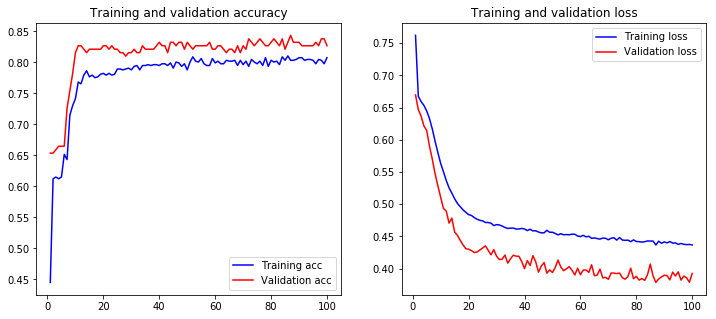

In [14]:
#Using Artificial Neural Networks for predicting the survival rate
from keras.models import Sequential
from keras.layers import Dense
input_dim = X1_train.shape[1]  # Number of features
model_krs = Sequential()
#Making the Layers of Neural Network:
model_krs.add(Dense(10, input_dim=input_dim, activation='relu'))
model_krs.add(Dense(1, activation='sigmoid'))
model_krs.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_krs.summary()
history = model_krs.fit(X1_train, y1_train, epochs=100, verbose=True, validation_data=(X1_test, y1_test), batch_size=10)#Saving the training data of every epoch to plot a graph afterwards
loss, accuracy = model_krs.evaluate(X1_train, y1_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_krs.evaluate(X1_test, y1_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#Plotting a graph to visualize our training and validation test results
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 378us/step - loss: 0.6501 - acc: 0.6110 - val_loss: 0.5331 - val_acc: 0.6704
Epoch 2/100
712/712 [==============================] - 0s 101us/step - loss: 0.5563 - acc: 0.7570 - val_loss: 0.4979 - val_acc: 0.8156
Epoch 3/100
712/712 [==============================] - 0s 102us/step - loss: 0.5160 - acc: 0.7949 - val_loss: 0.4330 - val_acc: 0.8324
Epoch 4/100
712/712 [==============================] - 0s 104us/step - loss: 0.4962 -

Epoch 57/100
712/712 [==============================] - 0s 102us/step - loss: 0.4354 - acc: 0.8090 - val_loss: 0.3608 - val_acc: 0.8436
Epoch 58/100
712/712 [==============================] - 0s 99us/step - loss: 0.4325 - acc: 0.8090 - val_loss: 0.3580 - val_acc: 0.8492
Epoch 59/100
712/712 [==============================] - 0s 97us/step - loss: 0.4280 - acc: 0.8146 - val_loss: 0.3543 - val_acc: 0.8547
Epoch 60/100
712/712 [==============================] - 0s 96us/step - loss: 0.4306 - acc: 0.8146 - val_loss: 0.3653 - val_acc: 0.8436
Epoch 61/100
712/712 [==============================] - 0s 94us/step - loss: 0.4353 - acc: 0.8118 - val_loss: 0.4074 - val_acc: 0.8380
Epoch 62/100
712/712 [==============================] - 0s 94us/step - loss: 0.4309 - acc: 0.8132 - val_loss: 0.3646 - val_acc: 0.8492
Epoch 63/100
712/712 [==============================] - 0s 95us/step - loss: 0.4305 - acc: 0.8048 - val_loss: 0.3774 - val_acc: 0.8436
Epoch 64/100
712/712 [==============================] 

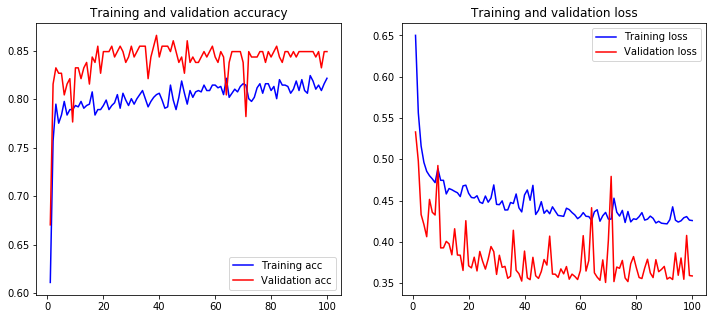

In [15]:
input_dim = X1_train.shape[1]  # Number of features
model_krs_1 = Sequential()
#Making the Layers of Neural Network(The difference in the above Neural Network and this one is in the number of nodes in the network in the middle layer. 
#It is only 10 for the prior one but 100 for this one):
model_krs_1.add(Dense(100, input_dim=input_dim, activation='relu'))
model_krs_1.add(Dense(1, activation='sigmoid'))
model_krs_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_krs_1.summary()
history1 = model_krs_1.fit(X1_train, y1_train, epochs=100, verbose=True, validation_data=(X1_test, y1_test), batch_size=10)#Saving the training data of every epoch to plot a graph afterwards
loss1, accuracy1 = model_krs_1.evaluate(X1_train, y1_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss1, accuracy1 = model_krs_1.evaluate(X1_test, y1_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy1))
#Plotting a graph to visualize our training and validation test results
def plot_history1(history1):
    acc1 = history1.history['acc']
    val_acc1 = history1.history['val_acc']
    loss1 = history1.history['loss']
    val_loss1 = history1.history['val_loss']
    x1 = range(1, len(acc1) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x1, acc1, 'b', label='Training acc')
    plt.plot(x1, val_acc1, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x1, loss1, 'b', label='Training loss')
    plt.plot(x1, val_loss1, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history1(history1)

In [16]:
y_predict = model_krs.predict(X_test)
y_predict_1 = model_krs_1.predict(X_test)
mean = (min(y_predict)+max(y_predict))/2
mean_1 = (min(y_predict_1)+max(y_predict_1))/2
int_y_predict=[x for x in range(y_predict.shape[0])]#Since y_predict has a float type value and for submission on kaggle we need an int value so we define an array for the same with the required type and have 0s and 1s as inputs in this
int_y_predict_1=[x for x in range(y_predict_1.shape[0])]
#Since Artificial Neural Networks do not give predictions in 0(s) or 1(s) but in decimal numbers which can have any float 
#type value, so based on those values we need to classify them as 0 and 1 using mean of the extremes of the predicted data

for i in range(y_predict.shape[0]):
    if y_predict[i]>=mean:
        int_y_predict[i]=1
    else:
        int_y_predict[i]=0
for i in range(y_predict_1.shape[0]):
    if y_predict_1[i]>=mean_1:
        int_y_predict_1[i]=1
    else:
        int_y_predict_1[i]=0
        
Prediction7 = pd.DataFrame ({'PassengerId': df_test.PassengerId})
Prediction8 = pd.DataFrame ({'PassengerId': df_test.PassengerId})
Prediction7['Survived'] = int_y_predict
Prediction8['Survived'] = int_y_predict_1
Prediction7.to_csv('Titanic_survival_krs.csv', index=False)#Saving the obtained predicted results
Prediction8.to_csv('Titanic_survival_krs_1.csv', index=False)#Saving the obtained predicted results

numpy.int64